## Library

In [1]:
!pip install tensorflow

In [31]:
pip install wandb

## Drive mounting and quick glance

In [35]:
import wandb
from wandb.keras import WandbCallback
wandb.login(relogin=True)

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_csv('/content/drive/MyDrive/data.csv')
df.drop(columns=['day_of_week', 'day_of_year'],  inplace=True)

In [4]:
df.head(1)

,date,latitude,longitude,target_pm25,pm25_lag_1d,pm10_lag_1d,no2_lag_1d,co,so2,o3,temperature_c,wind_speed_ms,wind_direction_deg,humidity_perc,pressure_hpa,tempo_no2_col,tempo_hcho_col
0,2017-01-02,29.733726,-95.257593,6.9,16.4,21.0,9.918182,0.20825,-0.38125,0.015353,20.532407,2.80372,233.483333,62.739131,1011.25,0.000169,0.000114


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65856 entries, 0 to 65855
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                65856 non-null  object 
 1   latitude            65856 non-null  float64
 2   longitude           65856 non-null  float64
 3   target_pm25         65856 non-null  float64
 4   pm25_lag_1d         65856 non-null  float64
 5   pm10_lag_1d         65856 non-null  float64
 6   no2_lag_1d          65856 non-null  float64
 7   co                  65856 non-null  float64
 8   so2                 65856 non-null  float64
 9   o3                  65856 non-null  float64
 10  temperature_c       65856 non-null  float64
 11  wind_speed_ms       65856 non-null  float64
 12  wind_direction_deg  65856 non-null  float64
 13  humidity_perc       65856 non-null  float64
 14  pressure_hpa        65856 non-null  float64
 15  tempo_no2_col       65856 non-null  float64
 16  temp

In [6]:
df.isna().sum()

,0
date,0
latitude,0
longitude,0
target_pm25,0
pm25_lag_1d,0
pm10_lag_1d,0
no2_lag_1d,0
co,0
so2,0
o3,0


In [7]:
df.describe()

,latitude,longitude,target_pm25,pm25_lag_1d,pm10_lag_1d,no2_lag_1d,co,so2,o3,temperature_c,wind_speed_ms,wind_direction_deg,humidity_perc,pressure_hpa,tempo_no2_col,tempo_hcho_col
count,65856.000000,65856.000000,65856.000000,65856.000000,65856.000000,65856.000000,65856.000000,65856.000000,65856.000000,65856.000000,65856.000000,65856.000000,65856.000000,65856.000000,65856.000000,65856.000000
mean,38.068678,-92.485904,8.324589,8.321052,19.280379,9.050311,0.239829,0.524236,0.029866,14.936669,2.130227,189.455813,60.359861,1154.775853,0.000299,0.000100
std,5.033817,14.749471,5.594531,5.629920,13.297600,6.277688,0.138186,0.928715,0.011266,10.401651,1.459428,64.201348,19.404840,1915.688527,0.000115,0.000028
min,27.965650,-147.727413,-4.247917,-4.247917,-1.000000,-4.463636,-0.210417,-1.720807,0.000000,-35.809028,0.000000,1.000000,0.000000,39.016667,0.000100,0.000050
25%,34.066590,-104.778334,4.812500,4.802778,11.000000,4.545833,0.166039,0.100000,0.021588,7.731482,1.151068,147.708333,47.833333,981.333333,0.000202,0.000076
50%,38.656429,-90.198348,7.225000,7.204167,16.500000,7.482609,0.208146,0.302083,0.029706,16.226852,1.774832,191.000000,62.875000,994.675000,0.000300,0.000100
75%,41.182227,-80.785683,10.545833,10.513385,24.000000,11.879167,0.278334,0.662500,0.037882,23.171296,2.732984,235.208333,74.458333,1008.083333,0.000398,0.000124
max,64.845690,-71.082600,190.704688,190.704688,445.000000,140.650000,2.297619,33.457143,0.074353,41.597222,14.899584,353.000000,100.000000,22388.750000,0.000500,0.000150


## Preprocessing

### standard lon and lat

In [37]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

df['lat_rad'] = np.radians(df['latitude'])
df['lon_rad'] = np.radians(df['longitude'])

df['x'] = np.cos(df['lat_rad']) * np.cos(df['lon_rad'])
df['y'] = np.cos(df['lat_rad']) * np.sin(df['lon_rad'])
df['z'] = np.sin(df['lat_rad'])

In [9]:
df.head()

,date,latitude,longitude,target_pm25,pm25_lag_1d,pm10_lag_1d,no2_lag_1d,co,so2,o3,temperature_c,wind_speed_ms,wind_direction_deg,humidity_perc,pressure_hpa,tempo_no2_col,tempo_hcho_col,lat_rad,lon_rad,x,y,z
0,2017-01-02,29.733726,-95.257593,6.9,16.4,21.0,9.918182,0.208250,-0.381250,0.015353,20.532407,2.803720,233.483333,62.739131,1011.250000,0.000169,0.000114,0.518951,-1.662559,-0.079569,-0.864686,0.49597
1,2017-01-05,29.733726,-95.257593,15.7,8.8,14.0,7.558333,0.286230,-0.120833,0.008412,11.134259,2.272128,59.941667,64.880953,1013.166667,0.000465,0.000089,0.518951,-1.662559,-0.079569,-0.864686,0.49597
2,2017-01-08,29.733726,-95.257593,10.0,8.2,10.0,8.004167,0.294536,1.345341,0.023941,3.333333,1.794123,91.254167,43.604167,1038.583333,0.000107,0.000087,0.518951,-1.662559,-0.079569,-0.864686,0.49597
3,2017-01-11,29.733726,-95.257593,12.2,10.2,57.0,9.257895,0.222479,-0.422916,0.028118,21.967593,5.594578,191.612500,68.895833,1017.333333,0.000174,0.000098,0.518951,-1.662559,-0.079569,-0.864686,0.49597
4,2017-01-14,29.733726,-95.257593,6.7,8.7,21.5,9.145833,0.189125,-0.313636,0.028706,18.634259,2.171382,112.633333,79.541667,1026.916667,0.000368,0.000085,0.518951,-1.662559,-0.079569,-0.864686,0.49597


### min max scaler

In [38]:
from sklearn.preprocessing import MinMaxScaler

exclude_cols = ['date']
cols_to_scale = df.columns.difference(exclude_cols)
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
df_scaled[exclude_cols] = df[exclude_cols]
print(df_scaled.head())


         date  latitude  longitude  target_pm25  pm25_lag_1d  pm10_lag_1d  \
0  2017-01-02  0.047941   0.684584     0.057183     0.105912     0.049327   
1  2017-01-05  0.047941   0.684584     0.102322     0.066929     0.033632   
2  2017-01-08  0.047941   0.684584     0.073084     0.063851     0.024664   
3  2017-01-11  0.047941   0.684584     0.084369     0.074110     0.130045   
4  2017-01-14  0.047941   0.684584     0.056157     0.066416     0.050448   

   no2_lag_1d        co       so2        o3  temperature_c  wind_speed_ms  \
0    0.099107  0.166930  0.038079  0.206488       0.727867       0.188174   
1    0.082845  0.198022  0.045482  0.113136       0.606453       0.152496   
2    0.085918  0.201334  0.087161  0.321991       0.505674       0.120414   
3    0.094557  0.172603  0.036895  0.378169       0.746408       0.375486   
4    0.093785  0.159305  0.040001  0.386077       0.703345       0.145734   

   wind_direction_deg  humidity_perc  pressure_hpa  tempo_no2_col  \
0    

In [11]:
df_scaled.head()

,date,latitude,longitude,target_pm25,pm25_lag_1d,pm10_lag_1d,no2_lag_1d,co,so2,o3,temperature_c,wind_speed_ms,wind_direction_deg,humidity_perc,pressure_hpa,tempo_no2_col,tempo_hcho_col,lat_rad,lon_rad,x,y,z
0,2017-01-02,0.047941,0.684584,0.057183,0.105912,0.049327,0.099107,0.166930,0.038079,0.206488,0.727867,0.188174,0.660464,0.627391,0.043501,0.172862,0.642469,0.047941,0.684584,0.516075,0.016098,0.061958
1,2017-01-05,0.047941,0.684584,0.102322,0.066929,0.033632,0.082845,0.198022,0.045482,0.113136,0.606453,0.152496,0.167448,0.648810,0.043587,0.912441,0.392138,0.047941,0.684584,0.516075,0.016098,0.061958
2,2017-01-08,0.047941,0.684584,0.073084,0.063851,0.024664,0.085918,0.201334,0.087161,0.321991,0.505674,0.120414,0.256404,0.436042,0.044724,0.017048,0.369068,0.047941,0.684584,0.516075,0.016098,0.061958
3,2017-01-11,0.047941,0.684584,0.084369,0.074110,0.130045,0.094557,0.172603,0.036895,0.378169,0.746408,0.375486,0.541513,0.688958,0.043773,0.185778,0.476948,0.047941,0.684584,0.516075,0.016098,0.061958
4,2017-01-14,0.047941,0.684584,0.056157,0.066416,0.050448,0.093785,0.159305,0.040001,0.386077,0.703345,0.145734,0.317140,0.795417,0.044202,0.669301,0.348071,0.047941,0.684584,0.516075,0.016098,0.061958


### calculate aqi

In [39]:
pollutant_cols = ['pm25_lag_1d', 'pm10_lag_1d', 'no2_lag_1d', 'co', 'so2', 'o3', 'temperature_c', 'wind_speed_ms', 'wind_direction_deg', 'humidity_perc', 'pressure_hpa', 'tempo_no2_col', 'tempo_hcho_col']

df_scaled['aqi'] = df_scaled[pollutant_cols].max(axis=1)

### remove uneeded columns

In [40]:
df_scaled.drop(columns=['target_pm25', 'longitude', 'latitude'], inplace=True)

In [14]:
df_scaled.columns

Index(['date', 'pm25_lag_1d', 'pm10_lag_1d', 'no2_lag_1d', 'co', 'so2', 'o3',
       'temperature_c', 'wind_speed_ms', 'wind_direction_deg', 'humidity_perc',
       'pressure_hpa', 'tempo_no2_col', 'tempo_hcho_col', 'lat_rad', 'lon_rad',
       'x', 'y', 'z', 'aqi'],
      dtype='object')

In [15]:
df_scaled.head(30)

,date,pm25_lag_1d,pm10_lag_1d,no2_lag_1d,co,so2,o3,temperature_c,wind_speed_ms,wind_direction_deg,humidity_perc,pressure_hpa,tempo_no2_col,tempo_hcho_col,lat_rad,lon_rad,x,y,z,aqi
0,2017-01-02,0.105912,0.049327,0.099107,0.166930,0.038079,0.206488,0.727867,0.188174,0.660464,0.627391,0.043501,0.172862,0.642469,0.047941,0.684584,0.516075,0.016098,0.061958,0.727867
1,2017-01-05,0.066929,0.033632,0.082845,0.198022,0.045482,0.113136,0.606453,0.152496,0.167448,0.648810,0.043587,0.912441,0.392138,0.047941,0.684584,0.516075,0.016098,0.061958,0.912441
2,2017-01-08,0.063851,0.024664,0.085918,0.201334,0.087161,0.321991,0.505674,0.120414,0.256404,0.436042,0.044724,0.017048,0.369068,0.047941,0.684584,0.516075,0.016098,0.061958,0.505674
3,2017-01-11,0.074110,0.130045,0.094557,0.172603,0.036895,0.378169,0.746408,0.375486,0.541513,0.688958,0.043773,0.185778,0.476948,0.047941,0.684584,0.516075,0.016098,0.061958,0.746408
4,2017-01-14,0.066416,0.050448,0.093785,0.159305,0.040001,0.386077,0.703345,0.145734,0.317140,0.795417,0.044202,0.669301,0.348071,0.047941,0.684584,0.516075,0.016098,0.061958,0.795417
5,2017-01-17,0.074623,0.096413,0.106074,0.162307,0.039442,0.157438,0.702747,0.194504,0.317483,0.769167,0.043782,0.507576,0.184758,0.047941,0.684584,0.516075,0.016098,0.061958,0.769167
6,2017-01-20,0.046411,0.025785,0.119454,0.195447,0.046210,0.251584,0.712017,0.118544,0.638471,0.716342,0.043318,0.419824,0.214805,0.047941,0.684584,0.516075,0.016098,0.061958,0.716342
7,2017-01-26,0.055644,0.051570,0.112046,0.184872,0.050457,0.251584,0.603463,0.161703,0.129735,0.341667,0.044064,0.008724,0.570904,0.047941,0.684584,0.516075,0.016098,0.061958,0.603463
8,2017-01-29,0.061286,0.067265,0.161490,0.225542,0.046430,0.264240,0.631872,0.150194,0.839323,0.339375,0.044118,0.084929,0.423952,0.047941,0.684584,0.516075,0.016098,0.061958,0.839323
9,2017-02-01,0.060260,0.084081,0.152245,0.163159,0.044772,0.367880,0.730857,0.269889,0.576693,0.642940,0.043747,0.199723,0.366466,0.047941,0.684584,0.516075,0.016098,0.061958,0.730857


### sort by date

In [41]:
df_scaled["date"] = pd.to_datetime(df_scaled["date"], errors="coerce")
df_scaled = df_scaled.sort_values("date").reset_index(drop=True)

# 3) kiểm tra
assert df_scaled["date"].is_monotonic_increasing
df_scaled.index = pd.to_datetime(df_scaled['date'], format='%Y-%m-%d')

In [17]:
df_scaled.head(5)

,date,pm25_lag_1d,pm10_lag_1d,no2_lag_1d,co,so2,o3,temperature_c,wind_speed_ms,wind_direction_deg,humidity_perc,pressure_hpa,tempo_no2_col,tempo_hcho_col,lat_rad,lon_rad,x,y,z,aqi
date,,,,,,,,,,,,,,,,,,,,
2010-01-02,2010-01-02,0.133612,0.051570,0.223399,0.299580,0.128433,0.179589,0.703943,0.088045,0.672779,0.331667,0.042369,0.792146,0.464620,0.168395,0.383722,0.041820,0.226495,0.212724,0.792146
2010-01-02,2010-01-02,0.065903,0.029148,0.107711,0.162561,0.061946,0.374995,0.539766,0.129622,0.125473,0.920417,0.043900,0.792146,0.464620,0.067688,0.737795,0.609799,0.020577,0.087167,0.920417
2010-01-03,2010-01-03,0.076418,0.031390,0.149689,0.190618,0.139883,0.155058,0.570867,0.110200,0.358748,0.508542,0.044103,0.282459,0.967764,0.047941,0.684584,0.516075,0.016098,0.061958,0.967764
2010-01-03,2010-01-03,0.220556,0.060538,0.129033,0.207991,0.052599,0.116297,0.568175,0.103582,0.388968,0.895833,0.043327,0.282459,0.967764,0.239037,0.364724,0.033823,0.277582,0.297601,0.967764
2010-01-03,2010-01-03,0.052053,0.042601,0.220448,0.390159,0.139830,0.185924,0.667459,0.089621,0.859066,0.346667,0.042351,0.282459,0.967764,0.168395,0.383722,0.041820,0.226495,0.212724,0.967764


### data splitting

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
target_col = "aqi"

def create_sequences(data, target_col, lookback):
    X, y, dates = [], [], []
    for i in range(len(data) - lookback):
        seq_X = data.iloc[i:i+lookback].drop(columns=['date', target_col]).values
        seq_y = data.iloc[i+lookback][target_col]
        seq_date = data.iloc[i+lookback]['date']
        X.append(seq_X)
        y.append(seq_y)
        dates.append(seq_date)
    return np.array(X), np.array(y), np.array(dates)

In [44]:
lookback = 7
X, y, dates = create_sequences(df_scaled, target_col, lookback)

In [45]:
X_train, X_test, y_train, y_test, dates_train, dates_test = train_test_split(
    X, y, dates, test_size=0.2, shuffle=False
)

In [22]:
df_scaled.columns

Index(['date', 'pm25_lag_1d', 'pm10_lag_1d', 'no2_lag_1d', 'co', 'so2', 'o3',
       'temperature_c', 'wind_speed_ms', 'wind_direction_deg', 'humidity_perc',
       'pressure_hpa', 'tempo_no2_col', 'tempo_hcho_col', 'lat_rad', 'lon_rad',
       'x', 'y', 'z', 'aqi'],
      dtype='object')

## training

In [51]:
wandb.init(project="NASA_AIR_QUALITY_FORECASTING", name="lstm_v1_simpleaqi_unit64_drop02_dense32relu_dense1_batch32",     config={
        "model": "LSTM",
        "units": 64,
        "dropout": 0.2,
        "batch_size": 32,
        "epochs": 50,
        "dense_units": 32,
        "loss": "mse",
        "optimizer": "adam",
        "learning_rate": 1e-3
    })

In [53]:
from wandb.keras import WandbCallback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam


config = wandb.config
model = Sequential([
    LSTM(config.units, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False),
    Dropout(config.dropout),
    Dense(32, activation='relu'),
    Dense(1)
])

optimizer = Adam(learning_rate=config.learning_rate)
model.compile(optimizer=optimizer, loss='mse')

# --- Huấn luyện ---
history = model.fit(
    X_train, y_train,
    epochs=config.epochs,
    batch_size=config.batch_size,
    validation_data=(X_test, y_test),
    callbacks=[WandbCallback(save_model=False, save_weights_only=False, save_graph=False)],
    verbose=1
)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1647/1647 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - loss: 0.0362 - val_loss: 0.0066
Epoch 2/50
1647/1647 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0081 - val_loss: 0.0063
Epoch 3/50
1647/1647 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0071 - val_loss: 0.0061
Epoch 4/50
1647/1647 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0067 - val_loss: 0.0053
Epoch 5/50
1647/1647 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0063 - val_loss: 0.0054
Epoch 6/50
1647/1647 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0063 - val_loss: 0.0059
Epoch 7/50
1647/1647 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.0063 - val_loss: 0.0061
Epoch 8/50
1647/1647 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0062 - val_loss: 0.0056
Epoch 9/50
1647/1647 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0062 - val_loss: 0.0052
Epoch 10/50
1647/1647 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0061 - val_loss: 0.0052
Epoch 11/50
1647/1647 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0060 - val_loss: 0.0053
Epoch 12/50
1647/1647 ━━━━━━━━━━━

412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


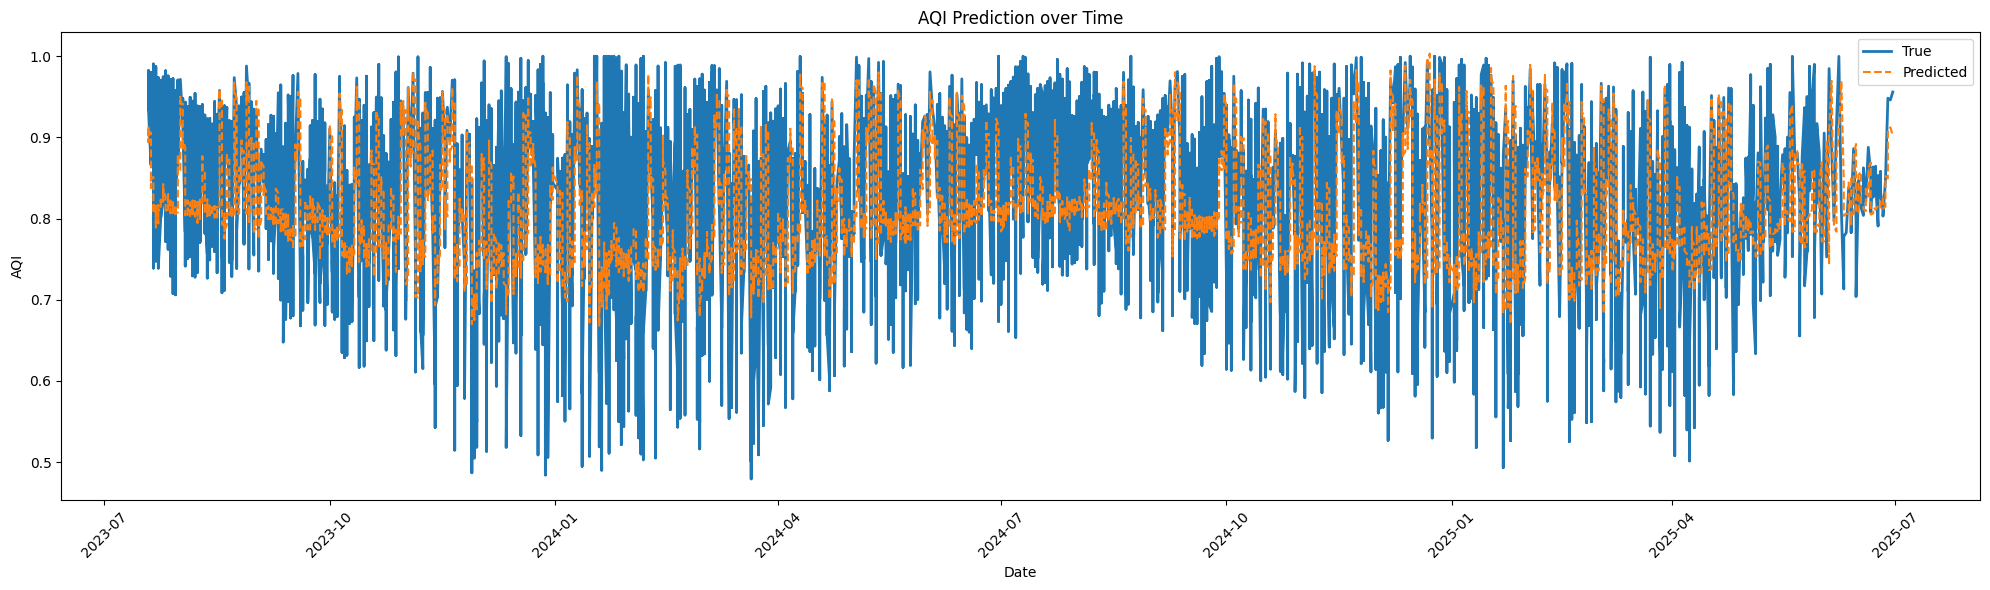

In [54]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)


plt.figure(figsize=(20, 6))
plt.plot(dates_test, y_test, label='True', linewidth=2)
plt.plot(dates_test, y_pred, label='Predicted', linestyle='--')
plt.legend()
plt.title("AQI Prediction over Time")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.3f}")
print(f"MSE:  {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R2 :  {r2:.3f}")


MAE:  0.051
MSE:  0.005
RMSE: 0.072
R2 :  0.481


In [27]:
df_scaled.to_csv("scaled.csv")

## saving model

In [56]:
model.save("lstm_global_model.h5")

In [57]:
import keras
keras.saving.save_model(model, "lstm_global_model.keras")

In [58]:
import os
os.listdir()

['.config',
 'scaled.csv',
 'lstm_global_model.keras',
 'drive',
 'wandb',
 'lstm_global_model.h5',
 'sample_data']

In [ ]:
from keras.models import load_model

model = load_model("lstm_global_model.keras")